In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

$$mL^2\ddot{\phi}=-mgLsin(\phi)+F_0cos(\omega t)$$

$$\frac{d}{dt}\left(
\begin{matrix}
    \phi   \\
    \omega
\end{matrix}\right)
=
\left[
\begin{matrix}
   \omega \\
   \dfrac{-g}{L}sin(\phi)+\frac{F_{0}cos(\omega)}{mL^2}
\end{matrix}\right]
=
f(\phi,\omega,t)
$$

$y_{n+1}$ es un conjunto de parametros

In [10]:
# constantes
m = 0.85 * 1.0937
L = 1.75 * 1.0937
F_o = 0.05 * 1.0937
g = 9.8
freq = np.sqrt(g/L)

# condiciones iniciales
phi_t0 = 0.
w_t0 = 0.

In [11]:
freq

2.2627934213805516

$y_{n+1}$ = $y_{n}+\frac{1}{6}(k_6+2(k_3+k_2)+k_1)$

$k_1=h f_n \quad f_n$ es la funcion f evaluada en $y_n$ es decir los parametros en el paso n 

$k_2=hf(t_n+\dfrac{h}{2},y_n +\dfrac{k_1}{2})$

$k_3=hf(t_n+\dfrac{h}{2},y_n +\dfrac{k_2}{2})$

$k_4=hf(t_n+h,y_n +k_3)$

In [12]:
#Funcion a resolver
def f(params,t):
    phi, omega =params
    output = np.array([omega, -g/L*np.sin(phi) + F_o * np.cos(omega_forz * t) / (m * L** 2 ) ])
    return output

In [13]:
# Usando RK4 no especifico para el problema
def calc_k1(f,params_n,t_n,h):
    fn= f(params_n,t_n)
    k1=h*fn
    return k1

def calc_k2(f,params_n,t_n,h):
    k1=calc_k1(f,params_n,t_n,h)
    params_k2=[params_n[i]+k1[i]/2. for i in range(len(params_n))]
    f_k2=f(params_k2,t_n+ h/2.)
    k2=h*f_k2
    return k2

def calc_k3(f,params_n,t_n,h):
    k2=calc_k2(f,params_n,t_n,h)
    params_k3=[params_n[i]+k2[i]/2. for i in range(len(params_n))]
    f_k3=f(params_k3,t_n+ h/2.)
    k3=h*f_k3
    return k3 

def calc_k4(f,params_n,t_n,h):
    k3=calc_k3(f,params_n,t_n,h)
    params_k4=[params_n[i]+k3[i] for i in range(len(params_n))]
    f_k4=f(params_k4,t_n+ h)
    k3=h*f_k4
    return k3 

def rk4_step(f,params_n,t_n,h):
    k1 = calc_k1(f,params_n,t_n,h)
    k2 = calc_k2(f,params_n,t_n,h)
    k3 = calc_k3(f,params_n,t_n,h)
    k4 = calc_k4(f,params_n,t_n,h)
    params_next=params_n+(k4 + 2*(k3 + k2) + k1)/6
    return params_next

In [14]:
# Parametros de Control
N_osc = 20             # Numero de osciolaciones
Nsteps = 1000          # Numero de pasos
t = np.linspace(0, N_osc * 2 * np.pi / freq, Nsteps)
h = N_osc * 2 * np.pi / (freq * Nsteps)
omega_forz= freq - 0.  # Frecuencia de forzaje

In [15]:
#Implementacion para encontrar phi y phi_punto

phi_arr = np.zeros(Nsteps)
omega_arr = np.zeros(Nsteps)

# Condiciones iniciales
phi_arr[0] = phi_t0
omega_arr[0] = w_t0

params=[phi_arr,omega_arr]

for i in range(1, Nsteps):
    params_i=[params[0][i-1],params[1][i-1]]
    phi_arr[i], omega_arr[i] = rk4_step(f, params_i, t[i-1], h)

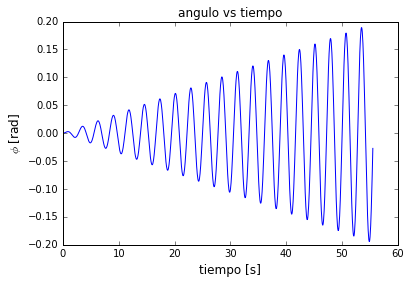

In [16]:
#Grafico

plt.plot(t, phi_arr, label='rk2')
plt.xlabel('tiempo [s]',fontsize=12)
plt.ylabel('$\phi$ [rad]',fontsize=12)
plt.title('angulo vs tiempo')
plt.savefig('forz_00.pdf')

In [25]:
# Parametros de Control
N_osc = 20             # Numero de osciolaciones
Nsteps = 1000          # Numero de pasos
t = np.linspace(0, N_osc * 2 * np.pi / freq, Nsteps)
h = N_osc * 2 * np.pi / (freq * Nsteps)
omega_forz= freq - 0.4  # Frecuencia de forzaje

# Condiciones iniciales
phi_arr[0] = phi_t0
omega_arr[0] = w_t0

#Implementacion para encontrar la amplitud maxima 
# y encontrar la frecuencia de forzaje

#                               Toma mucho tiempo

eps = 5e-3      #diferencia entre frecuencias de medicion
N_rep=1000
phi_max=[]      # lista de amplitudes maxima
omega_lista=[]  # lista de frecuencias de forzaje

phi_arr = np.zeros(Nsteps)   #reiniciar arreglos de phi
omega_arr = np.zeros(Nsteps) #reiniciar arreglos de omega


params=[phi_arr,omega_arr]


for j in range(N_rep):
    omega_forz+=eps
    for i in range(1, Nsteps):
        params_i=[params[0][i-1],params[1][i-1]]
        phi_arr[i], omega_arr[i] = rk4_step(f, params_i, t[i-1], h)
    phi_max.append(max(phi_arr))
    omega_lista.append(omega_forz)

In [26]:
max_phi= max(phi_max) 
max_omega_forz= omega_lista[np.where(phi_max == max(phi_max))[0][0]]
max_omega_2=omega_lista[np.argmax(phi_max)]
print max_omega_forz, max_phi , max_omega_2 , freq

2.25779342138 0.189995100553 2.25779342138 2.26279342138
